# CHAPTER 05. 영상입력 이진분류모델 레시피
숫자 손글씨 데이터셋인 MNIST을 이용하여 홀수/짝수를 구분을 위한 데이터셋을 생성해 보고, 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성하고 학습 시켜보겠습니다.

<br>

## 1. 데이터셋 준비

In [1]:
# 사용할 패키지 불러오기
import numpy as np
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, \
                         MaxPooling2D, Flatten, Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# MNIST 이미지의 가로, 세로 크기를 저장
width = 28
height = 28

In [3]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 164s 14us/step


In [5]:
# 0번째 이미지
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
# 0번째 라벨값
print(y_train[0])

5


In [7]:
# 데이터 총 개수
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

60000
60000
10000
10000


In [8]:
print(len(x_train[0]))     # 이미지의 세로
print(len(x_train[0][0]))  # 이미지의 가로

28
28


In [9]:
x_train = x_train.reshape(60000, width * height)
x_test = x_test.reshape(10000, width * height)

In [10]:
print(x_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [11]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
print(x_train[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [13]:
# 데이터 정규화
x_train /= 255.0
x_test /= 255.0

In [14]:
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [15]:
# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

In [16]:
# 검증셋 1만개
print(len(x_val))
# 훈련셋 5만개
print(len(x_train))

10000
50000


In [17]:
# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2 # 5 % 2 = 1 (홀수)
y_val = y_val % 2
y_test = y_test % 2

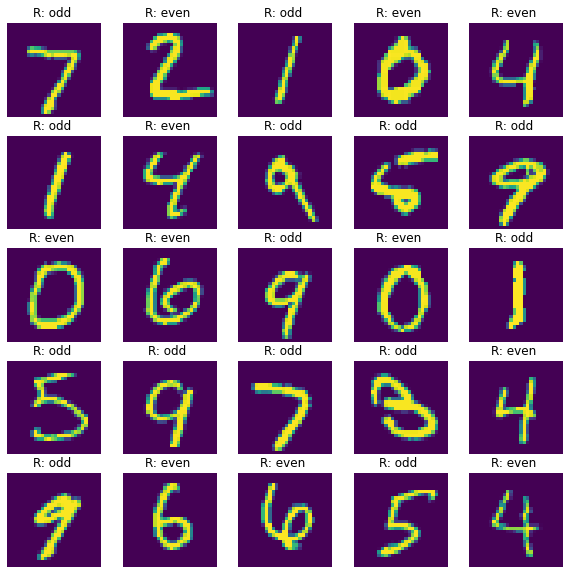

In [18]:
# 데이터셋 가시화
plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
  sub_plt = axarr[i//plt_row, i%plt_col]
  sub_plt.axis('off')
  sub_plt.imshow(x_test[i].reshape(width, height))
  
  sub_plt_title = 'R: '
  
  if y_test[i] :
    sub_plt_title += 'odd '
  else:
    sub_plt_title += 'even '
  
  sub_plt.set_title(sub_plt_title)
  
plt.show()

<br>

---

<br>

# 모델 준비
## 다층퍼셉트론 신경망 모델

<img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Binary_Classification_Model_Recipe_0m.png">


<br>
<br>

### 모델 구성하기

In [19]:
model = Sequential()

# 은닉층은 relu로 구성
model.add(Dense(256, input_dim=width * height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))

# 출력층은 이진 분류이므로 sigmoid로 구성
model.add(Dense(1, activation='sigmoid'))

In [20]:
# 딥러닝 모델 가시화
def visualize(model):
    return SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

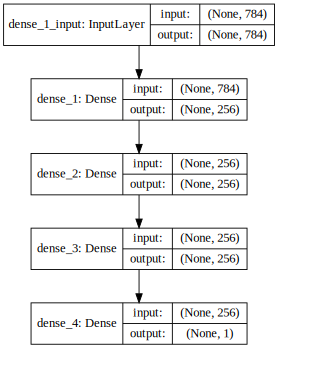

In [23]:
visualize(model)

In [22]:
def learningAndReview(model):
    # 모델 학습과정 설정하기
    #  이진분류이기 때문에 binary_crossentropy 사용
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    # 모델 학습시키기
    hist = model.fit(x_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(x_val, y_val))
    
    # 학습과정 살펴보기
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_ylim([0.0, 0.5])

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

    # 모델 평가하기
    loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
    print('## evaluation loss and metrics ##')
    print(loss_and_metrics)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 58us/step - loss: 0.2927 - accuracy: 0.8835 - val_loss: 0.1516 - val_accuracy: 0.9483
Epoch 2/10
50000/50000 [==============================] - 3s 54us/step - loss: 0.1278 - accuracy: 0.9555 - val_loss: 0.1002 - val_accuracy: 0.9666
Epoch 3/10
50000/50000 [==============================] - 3s 54us/step - loss: 0.0908 - accuracy: 0.9691 - val_loss: 0.0845 - val_accuracy: 0.9721
Epoch 4/10
50000/50000 [==============================] - 3s 53us/step - loss: 0.0723 - accuracy: 0.9745 - val_loss: 0.0722 - val_accuracy: 0.9764
Epoch 5/10
50000/50000 [==============================] - 3s 52us/step - loss: 0.0606 - accuracy: 0.9792 - val_loss: 0.0673 - val_accuracy: 0.9767
Epoch 6/10
50000/50000 [==============================] - 3s 54us/step - loss: 0.0515 - accuracy: 0.9823 - val_loss: 0.0628 - val_accuracy: 0.9798
Epoch 7/10
50000/50000 [==============================] - 3s 52us/st

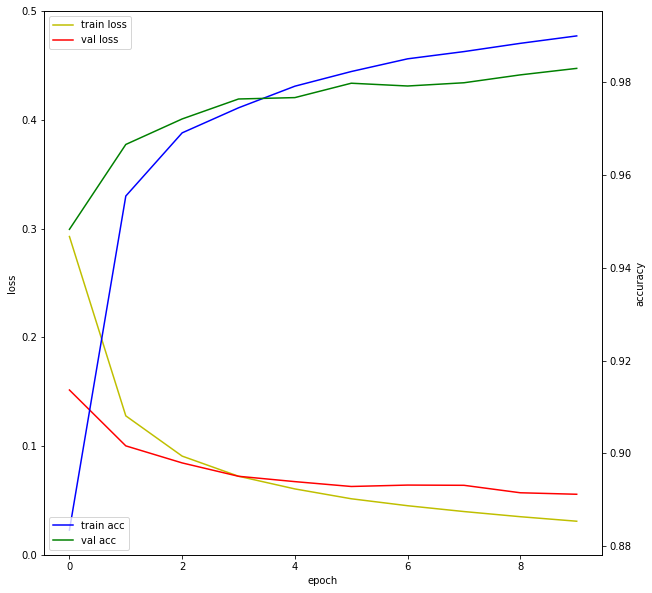

10000/10000 [==============================] - 0s 19us/step
## evaluation loss and metrics ##
[0.04940802383839618, 0.9824000000953674]


In [24]:
learningAndReview(model)

In [26]:
def use(model):
    yhat_test = model.predict(x_test, batch_size=32)
    print('=== yhat_test ===')
    print(yhat_test)

    plt_row = 5
    plt_col = 5

    plt.rcParams['figure.figsize'] = (10, 10)

    f, axarr = plt.subplots(plt_row, plt_col)

    for i in range(plt_row * plt_col):
        sub_plt = axarr[i // plt_row, i % plt_col]
        sub_plt.axis('off')
        sub_plt.imshow(x_test[i].reshape(width, height))

        sub_plt_title='R: '

        if y_test[i]:
            sub_plt_title += 'odd '
        else:
            sub_plt_title += 'even '

        sub_plt_title += 'P: '

        if yhat_test[i] >= 0.5:
            sub_plt_title += 'odd '
        else:
            sub_plt_title += 'even '

        sub_plt.set_title(sub_plt_title)

    plt.show()

=== yhat_test ===
[[9.9959791e-01]
 [1.8585324e-03]
 [9.9149185e-01]
 ...
 [1.6422455e-05]
 [9.9999738e-01]
 [3.0716814e-07]]


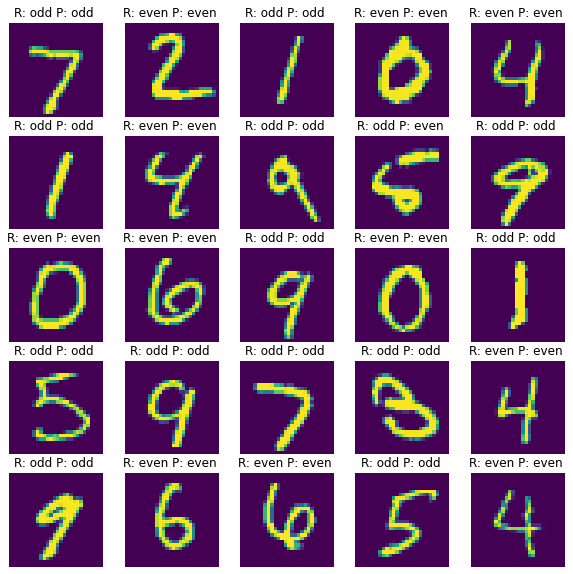

In [27]:
use(model)

<br>

---

<br>


# 컨볼루션 신경망 모델
<img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Binary_Classification_Model_Recipe_1m.png">

<br><br>

## 모델 구성하기

In [28]:
convModel = Sequential()

# Conv2D: 컨볼루션 신경망 레이어, 이미지의 특징을 추출한다.
#  첫 번째 인자: 32, 컨볼루션 필터 수
#  두 번째 인자: (3,3), 컨볼루션 커널의 (행, 열)
#  세 번째 인자: valid, 경계 처리 방법 (메서드에서는 생략됨). 생략되면 디폴트 값이 valid 이다.
#  네 번째 인자: relu, 활성화 함수
#  다섯 번째 인자: (width, height, 1), (행, 열, 채널수)
convModel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))

# MaxPooling2D: 컨볼루션 레이어의 출력 이미지에서 주요값만 뽑아 크기가 작은 출력 영상을 만든다.
#  첫 번째 인자: (2, 2), 수직, 수평 축소 비율을 지정한다.
convModel.add(MaxPooling2D(pool_size=(2, 2)))
convModel.add(Conv2D(32, (3, 3), activation='relu'))
convModel.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten: 영상을 일차원으로 바꿔주는 레이어
#  인자가 없고 이전 레이어의 출력 정보를 이용하여 입력과 출력 정보(길이)가 자동으로 설정된다.
convModel.add(Flatten())
convModel.add(Dense(256, activation='relu'))
convModel.add(Dense(1, activation='sigmoid'))

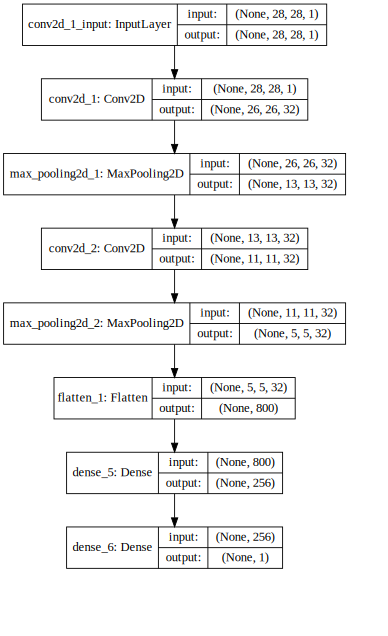

In [29]:
visualize(convModel)

In [30]:
# 훈련셋과 시험셋 불러오기
# reshape를 해주기 위해서 다시 데이터를 불러온다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# reshape(샘플 수, 행, 열, 채널 수) => reshape(60000, 28, 28, 1)
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s 427us/step - loss: 0.3232 - accuracy: 0.8585 - val_loss: 0.1328 - val_accuracy: 0.9537
Epoch 2/10
50000/50000 [==============================] - 22s 442us/step - loss: 0.1153 - accuracy: 0.9593 - val_loss: 0.1125 - val_accuracy: 0.9568
Epoch 3/10
50000/50000 [==============================] - 22s 440us/step - loss: 0.0820 - accuracy: 0.9714 - val_loss: 0.0844 - val_accuracy: 0.9682
Epoch 4/10
50000/50000 [==============================] - 20s 408us/step - loss: 0.0656 - accuracy: 0.9767 - val_loss: 0.0621 - val_accuracy: 0.9771
Epoch 5/10
50000/50000 [==============================] - 20s 408us/step - loss: 0.0561 - accuracy: 0.9802 - val_loss: 0.0492 - val_accuracy: 0.9833
Epoch 6/10
50000/50000 [==============================] - 24s 485us/step - loss: 0.0499 - accuracy: 0.9828 - val_loss: 0.0467 - val_accuracy: 0.9832
Epoch 7/10
50000/50000 [==============================] 

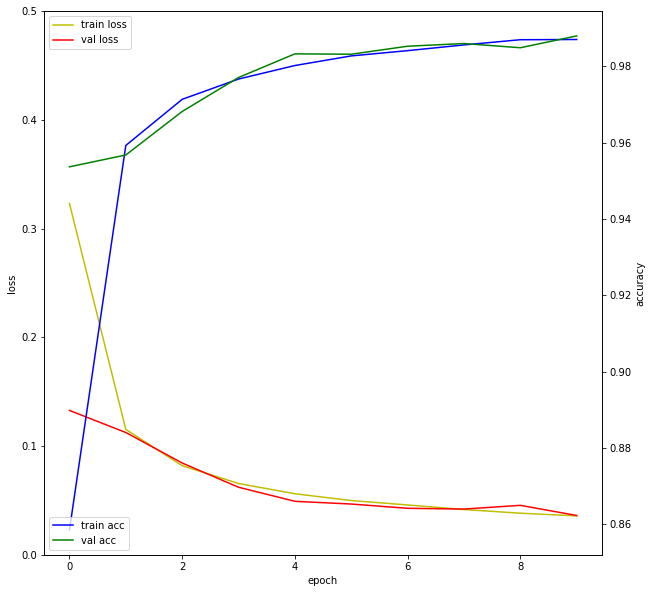

10000/10000 [==============================] - 1s 51us/step
## evaluation loss and metrics ##
[0.031012363424664364, 0.9901999831199646]


In [31]:
learningAndReview(convModel)

=== yhat_test ===
[[9.99867439e-01]
 [5.24133444e-04]
 [9.97571707e-01]
 ...
 [2.01363200e-05]
 [9.90698993e-01]
 [1.22980555e-05]]


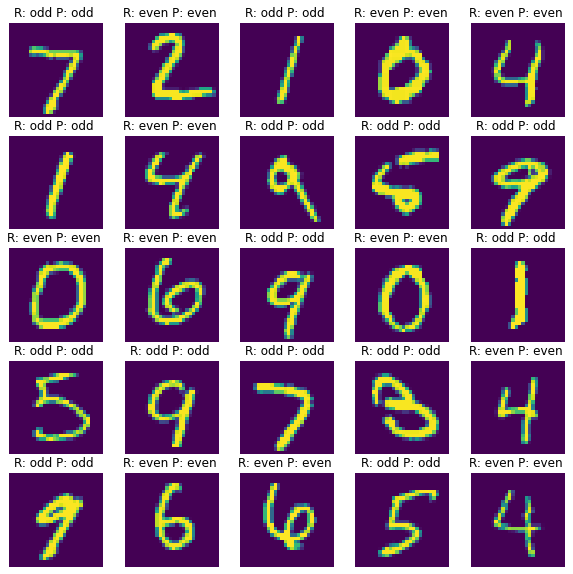

In [33]:
use(convModel)

<br>

---

<br>

# 깊은 컨볼루션 신경망 모델

<img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Binary_Classification_Model_Recipe_2m.png">

<br><br>

## 모델 구성하기

In [34]:
deepConvModel = Sequential()
deepConvModel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
deepConvModel.add(Conv2D(32, (3, 3), activation='relu'))
deepConvModel.add(MaxPooling2D(pool_size=(2, 2)))
deepConvModel.add(Dropout(0.25))
deepConvModel.add(Conv2D(64, (3, 3), activation='relu'))
deepConvModel.add(Conv2D(64, (3, 3), activation='relu'))
deepConvModel.add(MaxPooling2D(pool_size=(2, 2)))
deepConvModel.add(Flatten())
deepConvModel.add(Dense(256, activation='relu'))
deepConvModel.add(Dropout(0.5))
deepConvModel.add(Dense(1, activation='sigmoid'))

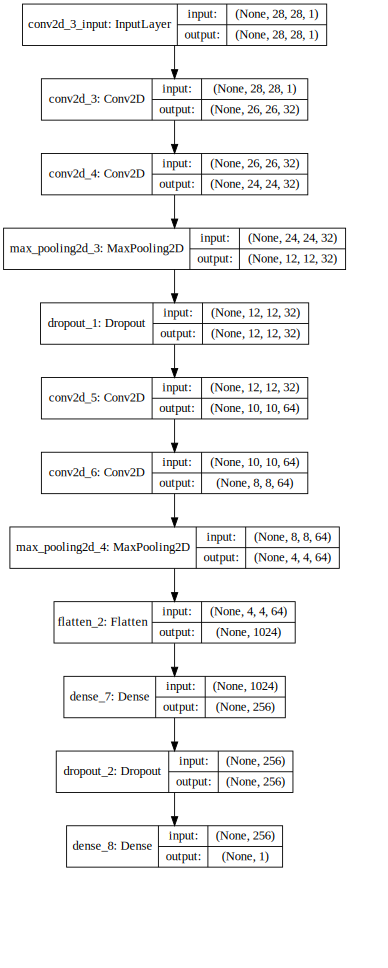

In [35]:
visualize(deepConvModel)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 73s 1ms/step - loss: 0.3996 - accuracy: 0.8169 - val_loss: 0.1425 - val_accuracy: 0.9513
Epoch 2/10
50000/50000 [==============================] - 75s 1ms/step - loss: 0.1401 - accuracy: 0.9480 - val_loss: 0.0704 - val_accuracy: 0.9746
Epoch 3/10
50000/50000 [==============================] - 76s 2ms/step - loss: 0.0929 - accuracy: 0.9669 - val_loss: 0.0536 - val_accuracy: 0.9811
Epoch 4/10
50000/50000 [==============================] - 74s 1ms/step - loss: 0.0758 - accuracy: 0.9736 - val_loss: 0.0501 - val_accuracy: 0.9828
Epoch 5/10
50000/50000 [==============================] - 76s 2ms/step - loss: 0.0644 - accuracy: 0.9782 - val_loss: 0.0445 - val_accuracy: 0.9850
Epoch 6/10
50000/50000 [==============================] - 71s 1ms/step - loss: 0.0571 - accuracy: 0.9802 - val_loss: 0.0392 - val_accuracy: 0.9865
Epoch 7/10
50000/50000 [==============================] - 73s 1ms/st

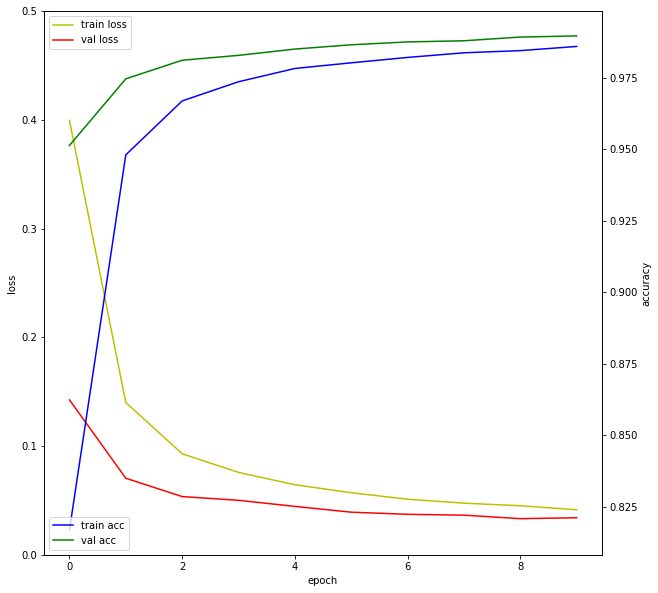

10000/10000 [==============================] - 2s 160us/step
## evaluation loss and metrics ##
[0.023899389228457586, 0.9919000267982483]


In [36]:
learningAndReview(deepConvModel)

=== yhat_test ===
[[9.9999881e-01]
 [2.2275115e-06]
 [9.9950200e-01]
 ...
 [3.9961824e-06]
 [9.9289584e-01]
 [2.8807219e-07]]


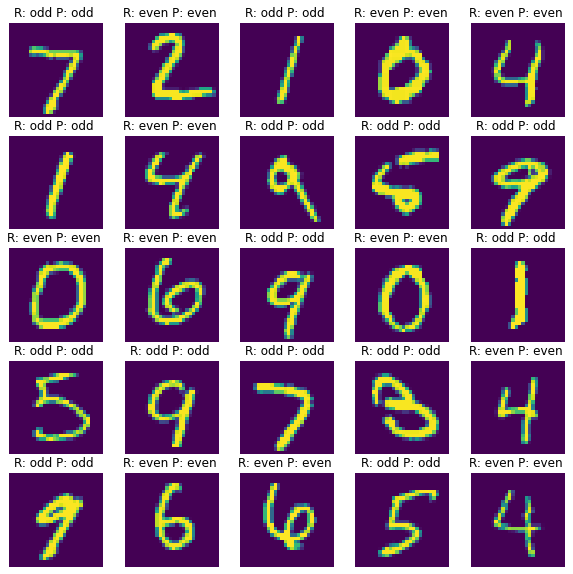

In [37]:
use(deepConvModel)

<br>

---

<br>

# 학습결과 비교

<table>
  <thead>
    <tr>
      <th style="text-align: center">다층퍼셉트론 신경망 모델</th>
      <th style="text-align: center">컨볼루션 신경망 모델</th>
      <th style="text-align: center">깊은 컨볼루션 신경망 모델</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center"><img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Binary_Classification_Model_Recipe_output_16_2.png" alt="img"></td>
      <td style="text-align: center"><img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Binary_Classification_Model_Recipe_output_18_1.png" alt="img"></td>
      <td style="text-align: center"><img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Binary_Classification_Model_Recipe_output_20_1.png" alt="img"></td>
    </tr>
  </tbody>
</table>

* 다층퍼셉트론과 컨볼루션 신경망을 보면 과적합이 발생하는 것을 알 수 있다.
* 깊은 컨볼루션 신경망 모델은 드롭아웃(Dropout) 레이어 덕분에 과적합이 발생하지 않고 검증 손실값이 지속적으로 떨어지는 것을 확인할 수 있다.

<br><br><br>

> 이진분류에 대해서 학습했고, 이번에는 다중뷴류에 대해서 학습을 해보자.
# CHAPTER 06. 영상입력 다중클래스분류모델 레시피
숫자 손글씨 데이터셋인 MNIST을 이용하여 다층퍼셉트론 및 컨볼루션 신경망 모델을 구성하고 학습시켜 보자.

<br>

## 1. 데이터셋 준비

In [38]:
# 훈련셋과 시험셋 불러오기
width = 28
height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width * height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width * height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

* 이진분류 학습의 전처리 방식
```python
# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2 # 5 % 2 = 1 (홀수)
y_val = y_val % 2
y_test = y_test % 2
```

* 다중뷴류 학습의 전처리 방식

In [39]:
# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [40]:
print(y_train[0]) # 6번째 인덱스가 1이므로 x_train[0]의 이미지는 5인 것을 알 수 있다.

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [41]:
def learningAndReview(model):
    # 모델 학습과정 설정하기
    #  다중분류이기 때문에 categorical_crossentropy 사용
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    
    # 모델 학습시키기
    hist = model.fit(x_train, y_train, epochs=10, batch_size=32, 
                    validation_data=(x_val, y_val))
    
    # 학습과정 살펴보기
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_ylim([0.0, 0.5])

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylim([0.8, 1.0])

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuracy')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

    # 모델 평가하기
    loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
    print('## evaluation loss and metrics ##')
    print(loss_and_metrics)

In [42]:
def use(model):
    yhat_test = model.predict(x_test, batch_size=32)
    print('==yhat_test==')
    print(yhat_test)
    plt_row = 5
    plt_col = 5

    plt.rcParams['figure.figsize'] = (10, 10)

    f, axarr = plt.subplots(plt_row, plt_col)

    cnt = 0
    i = 0

    while cnt < (plt_row * plt_col):
        if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
            i += 1
            continue
        sub_plt = axarr[cnt//plt_row, cnt%plt_col]
        sub_plt.axis('off')
        sub_plt.imshow(x_test[i].reshape(width, height))
        sub_plt_title = 'R: ' + str(np.argmax(y_test[i])) + ' P: ' + str(np.argmax(yhat_test[i]))
        sub_plt.set_title(sub_plt_title)

        i += 1
        cnt += 1

    plt.show()

<br>

---

<br>

# 모델 준비
### 다층퍼셉트론 신경망 모델

<img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_0m.png">

> 이진분류의 활성화 함수는 `sigmoid` 를 사용했었으나, 다중분류는 `softmax` 를 사용하는 것을 확인할 수 있다.

<img src="https://mlnotebook.github.io/img/transferFunctions/sigmoid.png">

<img src="https://t1.daumcdn.net/cfile/tistory/990DA44F5B41DC3705">


<br>
<br>

### 모델 구성하기

In [43]:
# 다층퍼셉트론 신경망 모델
model = Sequential()
model.add(Dense(256, input_dim= width * height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

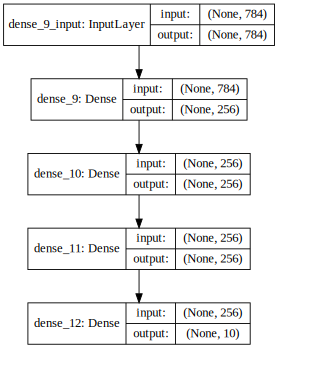

In [44]:
visualize(model)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 73us/step - loss: 0.6632 - accuracy: 0.8293 - val_loss: 0.2883 - val_accuracy: 0.9184
Epoch 2/10
50000/50000 [==============================] - 3s 69us/step - loss: 0.2805 - accuracy: 0.9184 - val_loss: 0.2255 - val_accuracy: 0.9342
Epoch 3/10
50000/50000 [==============================] - 3s 64us/step - loss: 0.2217 - accuracy: 0.9355 - val_loss: 0.1931 - val_accuracy: 0.9474
Epoch 4/10
50000/50000 [==============================] - 4s 73us/step - loss: 0.1848 - accuracy: 0.9466 - val_loss: 0.1629 - val_accuracy: 0.9551
Epoch 5/10
50000/50000 [==============================] - 4s 74us/step - loss: 0.1575 - accuracy: 0.9538 - val_loss: 0.1448 - val_accuracy: 0.9610
Epoch 6/10
50000/50000 [==============================] - 4s 77us/step - loss: 0.1366 - accuracy: 0.9596 - val_loss: 0.1323 - val_accuracy: 0.9654
Epoch 7/10
50000/50000 [==============================] - 4s 79us/st

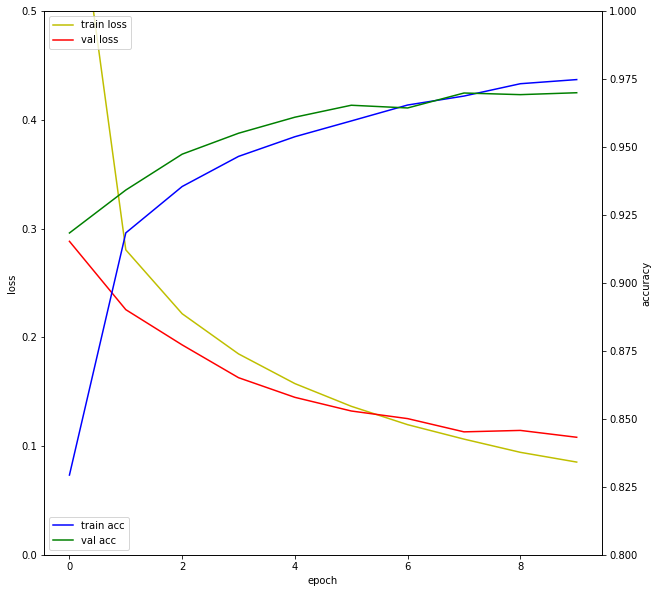

10000/10000 [==============================] - 0s 27us/step
## evaluation loss and metrics ##
[0.10806392347123474, 0.9670000076293945]


In [45]:
learningAndReview(model)

In [46]:
testValue = model.predict(x_test, batch_size=32)
print(testValue[0])

[6.9215814e-05 2.2241197e-06 2.3234829e-03 1.2460753e-02 1.5659833e-08
 3.3380336e-05 5.2509896e-10 9.8473793e-01 1.6729377e-05 3.5628382e-04]


In [47]:
sum = 0
for i in testValue[0]:
    sum += i
# 예측 값을 모두 더한 값이 1인 것으로 보아서, 다중예측의 결과 값들은 예측 확률을 의미하는 것을 알 수 있다.
print(sum)
print(np.argmax(testValue[0])) 
# testValue[0]에서 7의 값이 가장 높은 것으로 보아서,
#  모델이 x_test[0]의 값을 7로 예측했음을 알 수 있다.

1.0000000185437061
7


==yhat_test==
[[6.9215814e-05 2.2241197e-06 2.3234829e-03 ... 9.8473793e-01
  1.6729377e-05 3.5628382e-04]
 [2.8604762e-05 8.0744823e-05 9.9839205e-01 ... 9.2912028e-10
  1.2087146e-04 1.1916268e-09]
 [2.7728529e-05 9.9345726e-01 1.9614107e-03 ... 2.1366281e-03
  1.5694689e-03 1.3621543e-04]
 ...
 [2.4543734e-08 4.9637681e-09 2.4759942e-07 ... 5.5266869e-06
  8.6596672e-05 1.0043326e-03]
 [1.6134509e-06 5.8646572e-07 6.9195663e-09 ... 3.6786727e-08
  1.2509253e-04 2.2985721e-07]
 [5.7430252e-06 9.8906643e-09 4.3001869e-06 ... 5.0801856e-11
  2.2957085e-08 9.3918757e-09]]


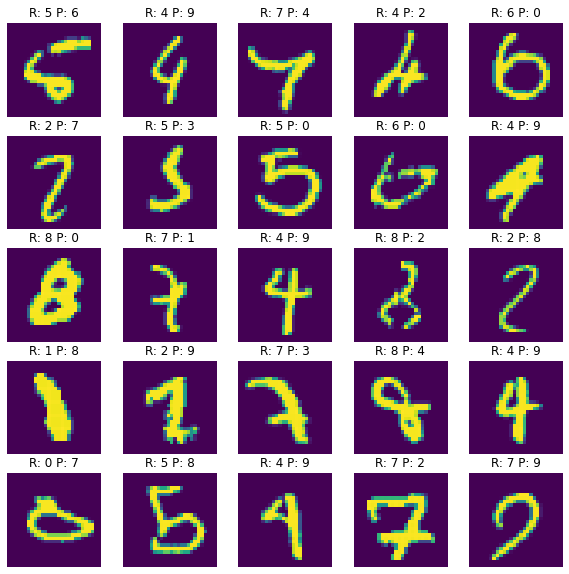

In [48]:
use(model)

<br>

---

<br>


# 컨볼루션 신경망 모델
<img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Binary_Classification_Model_Recipe_1m.png">

<br><br>

## 모델 구성하기

In [49]:
# 컨볼루션 모델이기 때문에 샘플의 채널수를 추가해줘야 한다.
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : one-hot 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [50]:
convModel = Sequential()
convModel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
convModel.add(MaxPooling2D(pool_size=(2, 2)))
convModel.add(Conv2D(32, (3, 3), activation='relu'))
convModel.add(MaxPooling2D(pool_size=(2, 2)))
convModel.add(Flatten())
convModel.add(Dense(256, activation='relu'))
convModel.add(Dense(10, activation='softmax'))

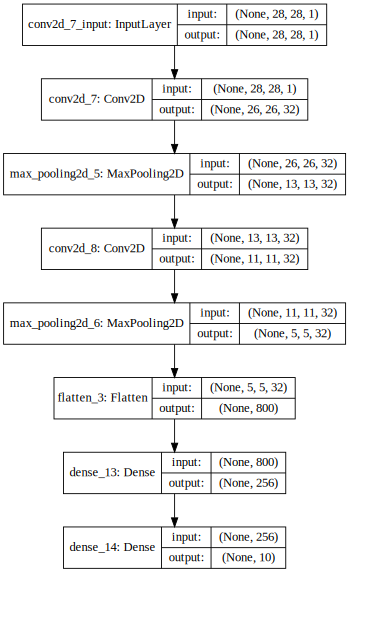

In [51]:
visualize(convModel)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 22s 443us/step - loss: 0.5961 - accuracy: 0.8247 - val_loss: 0.2255 - val_accuracy: 0.9306
Epoch 2/10
50000/50000 [==============================] - 20s 394us/step - loss: 0.1653 - accuracy: 0.9497 - val_loss: 0.1234 - val_accuracy: 0.9659
Epoch 3/10
50000/50000 [==============================] - 19s 388us/step - loss: 0.1140 - accuracy: 0.9648 - val_loss: 0.0932 - val_accuracy: 0.9739
Epoch 4/10
50000/50000 [==============================] - 20s 390us/step - loss: 0.0902 - accuracy: 0.9728 - val_loss: 0.0860 - val_accuracy: 0.9765
Epoch 5/10
50000/50000 [==============================] - 19s 389us/step - loss: 0.0758 - accuracy: 0.9760 - val_loss: 0.0752 - val_accuracy: 0.9776
Epoch 6/10
50000/50000 [==============================] - 19s 389us/step - loss: 0.0657 - accuracy: 0.9793 - val_loss: 0.0672 - val_accuracy: 0.9799
Epoch 7/10
50000/50000 [==============================] 

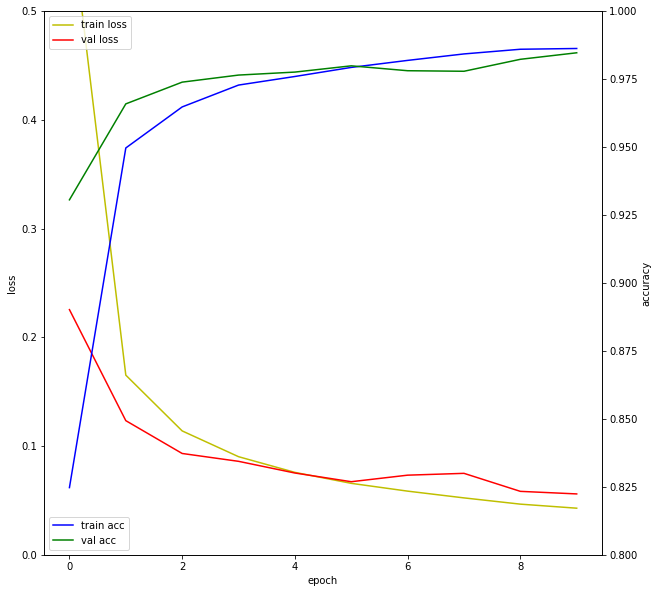

10000/10000 [==============================] - 0s 42us/step
## evaluation loss and metrics ##
[0.04153321859969292, 0.9871000051498413]


In [52]:
learningAndReview(convModel)

==yhat_test==
[[2.27224231e-08 2.52686220e-07 1.15174160e-04 ... 9.99827385e-01
  1.24281243e-07 1.64820528e-06]
 [7.43712931e-08 3.01619148e-05 9.99969721e-01 ... 1.05367355e-11
  1.98744043e-08 4.45037463e-16]
 [1.77663605e-05 9.98657227e-01 1.55271831e-04 ... 4.85804892e-04
  1.79918978e-04 3.21640036e-05]
 ...
 [4.17974932e-10 2.07958912e-08 1.97535033e-09 ... 7.28890029e-07
  6.79014136e-07 3.86421016e-06]
 [3.78043381e-07 3.90524635e-09 1.51004205e-08 ... 2.43952836e-09
  1.11328680e-02 4.16697468e-08]
 [1.56679931e-07 1.10865939e-09 2.98155697e-07 ... 3.29926245e-13
  2.20122104e-07 3.83786058e-10]]


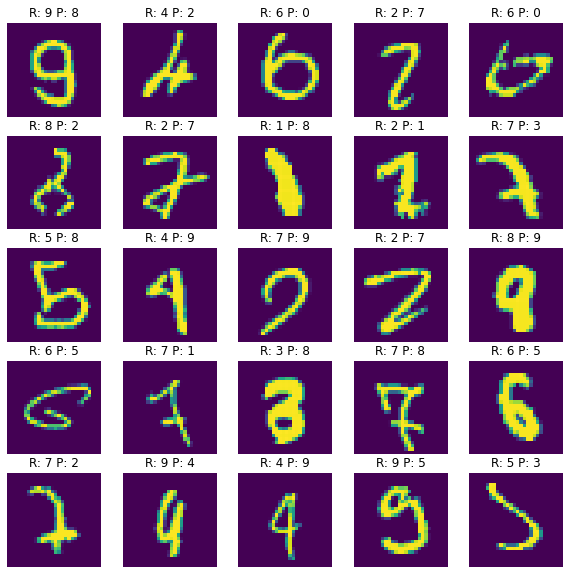

In [53]:
use(convModel)

<br>

---

<br>


# 깊은 컨볼루션 신경망 모델
<img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_2m.png">

<br><br>

## 모델 구성하기

In [56]:
deepConvModel = Sequential()
deepConvModel.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
deepConvModel.add(Conv2D(32, (3, 3), activation='relu'))
deepConvModel.add(MaxPooling2D(pool_size=(2, 2)))
deepConvModel.add(Dropout(0.25))
deepConvModel.add(Conv2D(64, (3, 3), activation='relu'))
deepConvModel.add(Conv2D(64, (3, 3), activation='relu'))
deepConvModel.add(MaxPooling2D(pool_size=(2, 2)))
deepConvModel.add(Dropout(0.25))
deepConvModel.add(Flatten())
deepConvModel.add(Dense(256, activation='relu'))
deepConvModel.add(Dropout(0.5))
deepConvModel.add(Dense(10, activation='softmax'))

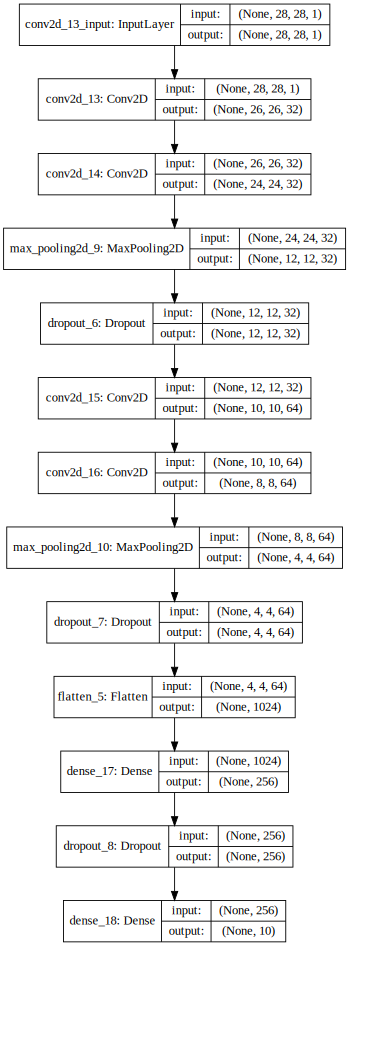

In [57]:
visualize(deepConvModel)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.8887 - accuracy: 0.6950 - val_loss: 0.1476 - val_accuracy: 0.9563
Epoch 2/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.2360 - accuracy: 0.9264 - val_loss: 0.0978 - val_accuracy: 0.9706
Epoch 3/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.1736 - accuracy: 0.9457 - val_loss: 0.0798 - val_accuracy: 0.9764
Epoch 4/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.1400 - accuracy: 0.9563 - val_loss: 0.0664 - val_accuracy: 0.9804
Epoch 5/10
50000/50000 [==============================] - 67s 1ms/step - loss: 0.1222 - accuracy: 0.9625 - val_loss: 0.0596 - val_accuracy: 0.9820
Epoch 6/10
50000/50000 [==============================] - 66s 1ms/step - loss: 0.1101 - accuracy: 0.9656 - val_loss: 0.0561 - val_accuracy: 0.9839
Epoch 7/10
50000/50000 [==============================] - 66s 1ms/st

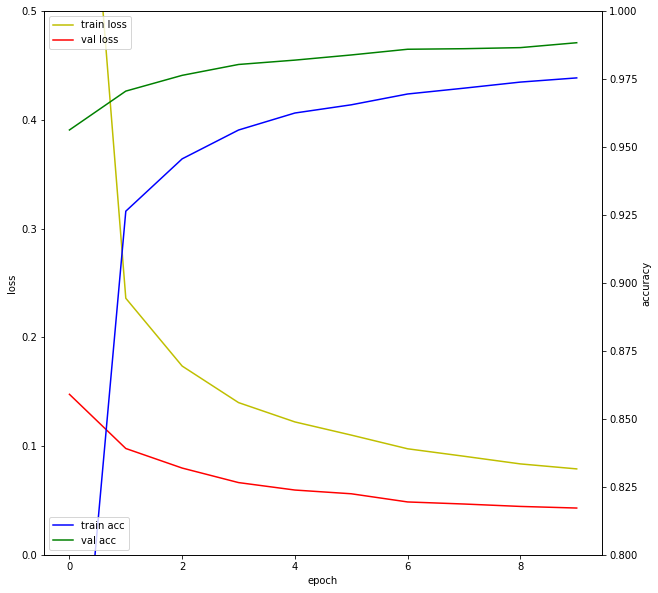

10000/10000 [==============================] - 1s 106us/step
## evaluation loss and metrics ##
[0.035585966402327175, 0.9882000088691711]


In [58]:
learningAndReview(deepConvModel)

==yhat_test==
[[3.1096469e-08 8.3534928e-08 8.8919851e-06 ... 9.9997842e-01
  1.4719440e-07 4.2312295e-06]
 [7.9288793e-06 8.9631634e-05 9.9989891e-01 ... 2.0624366e-08
  2.2105730e-06 6.5304540e-11]
 [1.7269977e-05 9.9959022e-01 9.7489283e-05 ... 1.8227489e-04
  2.2055061e-05 5.2923665e-06]
 ...
 [7.9818652e-11 6.8733584e-08 1.6139690e-10 ... 1.3465882e-07
  4.3467483e-07 4.3274922e-06]
 [3.6692303e-08 2.0905906e-10 2.0406825e-10 ... 1.9003346e-09
  9.7964687e-05 5.2289717e-08]
 [3.2003853e-05 6.3613726e-08 4.9437695e-06 ... 2.6334359e-09
  2.7337442e-06 6.4689360e-08]]


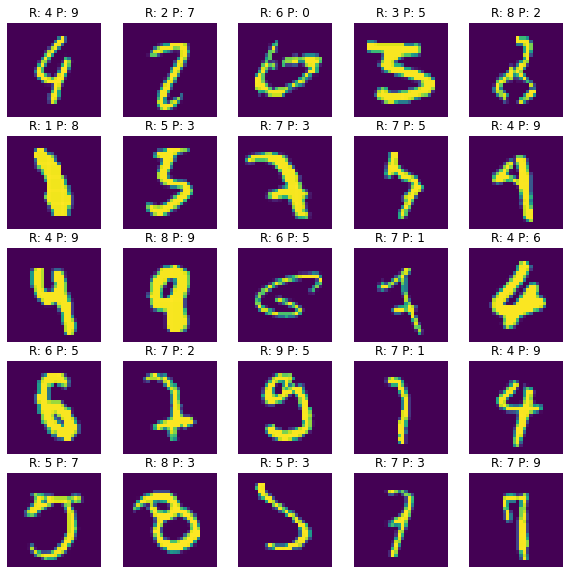

In [59]:
use(deepConvModel)

<br>

---

<br>

# 학습결과 비교
<table>
  <thead>
    <tr>
      <th style="text-align: center">다층퍼셉트론 신경망 모델</th>
      <th style="text-align: center">컨볼루션 신경망 모델</th>
      <th style="text-align: center">깊은 컨볼루션 신경망 모델</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: center"><img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_17_1.png" alt="img"></td>
      <td style="text-align: center"><img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_20_1.png" alt="img"></td>
      <td style="text-align: center"><img src="http://tykimos.github.io/warehouse/2017-8-18-Image_Input_Multiclass_Classification_Model_Recipe_output_23_1.png" alt="img"></td>
    </tr>
  </tbody>
</table>

* 다층퍼셉트론과 컨볼루션 신경망을 보면 과적합이 발생하는 것을 알 수 있다.
* 깊은 컨볼루션 신경망 모델은 드롭아웃(Dropout) 레이어 덕분에 과적합이 발생하지 않고 검증 손실값이 지속적으로 떨어지는 것을 확인할 수 있다.